# Devisree
# SALES PREDICTION USING PYTHON

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Reading Data

In [3]:
df=pd.read_csv('Advertising.csv')

In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [6]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
df.shape

(200, 5)

### Analysing Data

In [9]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [10]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


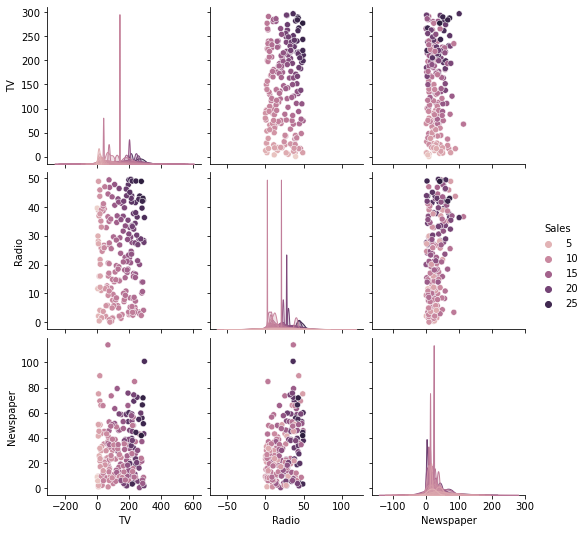

In [11]:
sns.pairplot(df,hue='Sales')

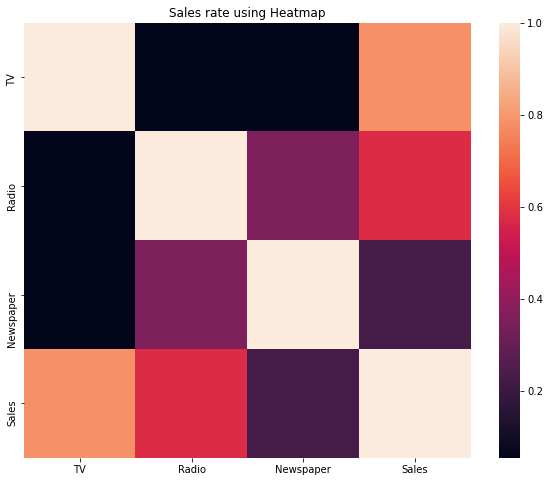

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())
plt.title("Sales rate using Heatmap")
plt.show()

In [13]:
df=df.values
X=df[:,:-1]
Y=df[:,-1]

In [14]:
X

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

In [15]:
Y

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 12.5,
        5.6, 15.5,  9.7, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,
       17.4,  9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 12.9,
        8.5, 14.9, 10.6, 23.2, 14.8,  9.7, 11.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 15.7, 14. , 18. ,  9.3,
        9.5, 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 12.3, 11.3, 13.6, 21.7, 15.2, 12. , 16. ,
       12.9, 16.7, 11.2,  7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5, 25.4,
       17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2,  7.2,  8.7,  5.3, 19.8,
       13.4, 21.8, 14.1, 15.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 11.6, 15.2, 19.7, 10.6,  6.6,  8.8, 24.7,  9.7,  1.6, 12.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16

### Fitting Model

In [16]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=0.2)

In [17]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
# Y_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [18]:
X_train

array([[-1.50585391, -1.27252492,  0.06879472],
       [-0.7733435 , -1.54810142, -0.95939656],
       [-0.8279911 , -0.82219258, -1.10628103],
       [ 1.26373306,  0.2599493 , -1.12923173],
       [-1.47794875, -0.19710441, -0.60136567],
       [ 0.44401903, -0.13661201, -0.37185869],
       [-0.69195346, -0.7549788 , -0.19284324],
       [-1.01286278, -0.74153604,  0.59666077],
       [ 0.6672603 ,  0.66323199,  0.72977482],
       [ 1.34861125,  0.38765548, -0.6518572 ],
       [-0.70939418,  0.85815196,  0.88124943],
       [ 0.41727659,  1.55717528,  1.31272256],
       [ 1.08583767, -1.05744082, -0.98234726],
       [-0.12222314, -0.25759682, -0.61972623],
       [ 0.83469125, -1.185147  , -0.12399115],
       [ 1.61952383, -0.61382986, -1.21185424],
       [-0.81752667,  0.24650654, -0.35808827],
       [ 0.51610736,  0.38093411, -0.54628399],
       [ 1.02072564, -1.31957457,  2.510749  ],
       [ 0.88003713, -1.25908216,  0.90420013],
       [ 0.94863731, -0.41218852, -0.179

In [19]:
X_test

array([[ 0.77288915,  0.0282827 , -0.90108526],
       [-0.94318978, -1.02714476, -1.47171802],
       [ 0.64335134, -0.13037633, -0.03578148],
       [ 0.28682524, -0.42010152, -0.07787734],
       [ 1.36115721, -1.42724144, -0.60173692],
       [-0.64727313,  1.33204602,  0.84823157],
       [-0.16715132, -1.33066638, -1.07882333],
       [-1.6990251 ,  0.39388829, -1.07414601],
       [ 0.85489015,  1.71144805, -1.36413971],
       [-0.68886784, -1.64798444, -0.42867617],
       [ 1.52753605,  1.70454983,  0.44130493],
       [ 1.08663212, -1.38585213,  0.21211636],
       [-0.42147327, -0.46838905,  0.29163076],
       [-1.60632832, -0.57186233,  0.80613571],
       [-0.71382466,  0.09036666,  1.91933733],
       [-1.4589642 ,  1.02162618, -1.07882333],
       [-0.89089929, -0.49598192, -0.91043989],
       [ 0.92025327, -1.10302516,  1.12887063],
       [-0.01265668, -0.02000483, -0.6204462 ],
       [-1.48035577,  0.75259566,  1.5685385 ],
       [ 1.12703841,  1.71144805,  0.558

In [20]:
Y_train

array([ 5.9,  8.8,  9.9, 19.8,  7.6, 15.5, 10.6,  9.7, 19. , 20.2, 13.3,
       21.2, 13.2, 13.2, 12.2, 15.9, 11.8, 17.3, 11.9, 11.7, 15.5, 11.7,
       11.5, 22.4, 18.5, 11.6, 23.8, 11.4, 18. ,  9.7, 18. , 11.4,  8.4,
       14. , 20.2, 21.7, 25.4, 12.5, 10.8, 25.5, 17.2, 25.4,  7.6, 19.2,
       17.6, 19.6,  9.7,  8.1,  9.7, 12.9, 14.6,  8.7, 10.4,  9.6, 23.8,
       10.1, 10.7, 12.5,  7.3, 14.8,  9.6,  8.8, 22.6, 19. , 16. , 10.3,
        6.6, 14.7,  5.7, 14.2,  5.5, 11.7, 11. , 11.7, 22.3, 15.5, 20.1,
       12.6,  5.3, 11.3, 10.8, 20.7,  8.5, 10.5,  9.4, 12.7, 24.2, 11.9,
       20.7, 13.4, 10.6, 12.2, 21.4, 12.9, 12.4,  9.7, 16.9, 20.7, 10.1,
        9.3, 14.7,  8.7, 12.2, 22.6,  4.8, 19.4, 20.8, 15.6,  6.9, 22.1,
       15.9, 13.4, 10.9,  6.7, 18. , 23.2, 19.2,  9.5, 15.9, 11. ,  3.2,
       14.9,  1.6,  7. ,  9.5, 15.2,  8.6, 12.8, 19.6, 23.7, 16.6, 10.5,
       18.9, 12.6, 11.8, 18.3, 15.2,  7.2,  6.6, 19.7, 12.9, 26.2, 14.1,
       15.7, 16.7, 13.6, 17.4, 12.8, 10.1, 17.3, 21

In [21]:
Y_test

array([17. ,  9.3, 16.6, 14.4, 12. , 15.3, 11.2,  5.3, 24.7,  8.7, 27. ,
       12.3, 11.9,  5.6, 12.9,  9.5, 10.9, 13.4, 14.6,  9.2, 25.4, 10.3,
       13.2, 22.2, 21.8, 17.1, 15.9, 12. , 11.8, 18.4, 14.9,  8. , 17.1,
       15. , 14.5, 16.1,  7.2, 10.4, 11.5, 11.6])

In [22]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,Y_train)

LinearRegression()

In [23]:
Y_pred=LR.predict(X_test)

In [24]:
for i in range(len(X_test)):
    print(Y_pred[i],Y_test[i])

17.056520348996155 17.0
7.4831854646375975 9.3
16.184087097927936 16.6
14.008072166901906 14.4
15.37598501104515 12.0
15.249900356537218 15.3
9.686976756736478 11.2
8.471305225244379 5.3
21.943247552952563 24.7
6.846274013104253 8.7
24.660804219446725 27.0
14.485412355514674 12.3
11.160092554552392 11.9
6.326315798802168 5.6
11.674656435272201 12.9
11.117262695594023 9.5
9.17916325419007 10.9
14.681392053327965 13.4
13.902924033851988 14.6
10.491704955267412 9.2
23.13727759496486 25.4
9.457071132978339 10.3
11.819001359263757 13.2
21.22905370106781 22.2
20.921203515789788 21.8
17.128714762596502 17.1
15.56618062593234 15.9
11.303967755601775 12.0
15.799025339370537 11.8
17.843666165883405 18.4
14.960493225766912 14.9
10.540736997700694 8.0
17.11165494231623 17.1
14.696949724744265 15.0
14.22505230396132 14.5
18.216742890434507 16.1
12.431114619351204 7.2
12.165729228213804 10.4
10.171130671135497 11.5
13.364951093023292 11.6


In [25]:
from sklearn.metrics import r2_score,accuracy_score
print(r2_score(Y_test,Y_pred)*100)


86.76558895156799


### Testing Own Data

In [26]:
X_own=[[220,  35,  10]]
X_own=ss.fit_transform(X_own)
Y_own=LR.predict(X_own)
Y_own

array([14.051875])